<a href="https://colab.research.google.com/github/risa1796/Hotel-Recommendation-System/blob/main/Hotels_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Hotel Recommendation 

- Hotels near my location

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/딥러닝기초/ HotelGo

/content/drive/MyDrive/딥러닝기초/ HotelGo


## Data Upload

In [3]:
import pandas as pd

In [4]:
hotel_details = pd.read_csv('Hotel_details.csv')
hotel_details.head()

,id,hotelid,hotelname,address,city,country,zipcode,propertytype,starrating,latitude,longitude,Source,url,curr
0,46406,1771651,Mediteran Bungalow Galeb,Vukovarska 7,Omis,Croatia,21310.0,Holiday parks,4,43.440124,16.682505,2,https://www.booking.com/hotel/hr/bungalow-luxu...,EUR
1,46407,177167,Hotel Polonia,Plac Teatralny 5,Torun,Poland,NaN,Hotels,3,53.012329,18.603800,5,https://www.agoda.com/en-gb/hotel-polonia/hote...,EUR
2,46408,1771675,Rifugio Sass Bece,"Belvedere del Pordoi,1",Canazei,Italy,38032.0,Hotels,3,46.477920,11.813350,2,http://www.booking.com/hotel/it/rifugio-sass-b...,EUR
3,46409,177168,Madalena Hotel,Mykonos,Mykonos,Greece,84600.0,Hotels,3,37.452316,25.329849,5,https://www.agoda.com/en-gb/madalena-hotel/hot...,EUR
4,46410,1771718,Pension Morenfeld,Mair im Korn Strasse 2,Lagundo,Italy,39022.0,Hotels,3,46.682780,11.131736,2,http://www.booking.com/hotel/it/pension-morenf...,EUR


In [5]:
hotel_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108048 entries, 0 to 108047
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            108048 non-null  int64  
 1   hotelid       108048 non-null  int64  
 2   hotelname     108048 non-null  object 
 3   address       102955 non-null  object 
 4   city          108048 non-null  object 
 5   country       108048 non-null  object 
 6   zipcode       83486 non-null   float64
 7   propertytype  108048 non-null  object 
 8   starrating    108048 non-null  int64  
 9   latitude      108048 non-null  float64
 10  longitude     108048 non-null  float64
 11  Source        108048 non-null  int64  
 12  url           107937 non-null  object 
 13  curr          108048 non-null  object 
dtypes: float64(3), int64(4), object(7)
memory usage: 11.5+ MB


In [6]:
# View columns by their data types
for dtype, cols in hotel_details.groupby(by=hotel_details.dtypes, axis=1):
  print(dtype)
  for col in list(cols):
    print(f'unique value of column "{col}" : ', hotel_details[col].nunique())
  print('---')

int64
unique value of column "id" :  108048
unique value of column "hotelid" :  106193
unique value of column "starrating" :  3
unique value of column "Source" :  2
---
float64
unique value of column "zipcode" :  17245
unique value of column "latitude" :  106881
unique value of column "longitude" :  107088
---
object
unique value of column "hotelname" :  96203
unique value of column "address" :  96978
unique value of column "city" :  25693
unique value of column "country" :  29
unique value of column "propertytype" :  8
unique value of column "url" :  107936
unique value of column "curr" :  8
---


In [7]:
duplicate_df = pd.DataFrame(hotel_details.hotelid.value_counts(ascending=False)).reset_index()
duplicate_df[duplicate_df['hotelid']>1]

,index,hotelid
0,172102,2
1,66032,2
2,191655,2
3,60055,2
4,366853,2
...,...,...
1850,231785,2
1851,71171,2
1852,89194,2
1853,325864,2


In [8]:
hotel_details[hotel_details['hotelid']==172102]

,id,hotelid,hotelname,address,city,country,zipcode,propertytype,starrating,latitude,longitude,Source,url,curr
104214,150620,172102,Best Western Hotel Rocca,Via Sferracavalli 105,Cassino,Italy,3043.0,Hotels,4,41.507394,13.833987,2,http://www.booking.com/hotel/it/rocca.en-gb.html,EUR
104215,150621,172102,The Coachman Hotel,4 Parkfoot Street,Kilsyth,United Kingdom,NaN,Hotels,3,55.978600,-4.058210,5,https://www.agoda.com/en-gb/the-coachman-hotel...,GBP


HotelId is is not unique

In [9]:
hotel_details.id.duplicated().sum()

0

Id is unique, indeed. We will delete hotelid column.

In [10]:
#hotel_details.drop('hotelid',axis=1, inplace=True)

In [11]:
hotel_details.starrating.value_counts()

3    56419
4    35892
2    15737
Name: starrating, dtype: int64

In [12]:
hotel_details.Source.value_counts()

2    68882
5    39166
Name: Source, dtype: int64

## Hotels near my location 

In [13]:
#! pip install geocoder

In [14]:
# Reference: https://medium.com/analytics-vidhya/finding-nearest-pair-of-latitude-and-longitude-match-using-python-ce50d62af546
from math import radians, cos, sin, asin, sqrt
def dist(lat1, long1, lat2, long2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lat1, long1, lat2, long2 = map(radians, [lat1, long1, lat2, long2])
    # haversine formula 
    dlon = long2 - long1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

In [15]:
def find_nearest(lat, long):
    distances = hotel_details.apply(
        lambda row: dist(lat, long, row['latitude'], row['longitude']), 
        axis=1)
    
    df = pd.DataFrame(distances,columns=['km_diff'])
    top10 = df.sort_values(by='km_diff')[:11]
    nearest_hotel = distances.idxmin()
    top10_index = top10.index.tolist()

    #display(hotel_details.loc[top10_index, 'hotelname'])
    #print('Nearest Hotel : ', hotel_details.loc[distances.idxmin(), 'hotelname'])
    return top10_index

In [16]:
#import geocoder
#g = geocoder.ip('me')
#my_position = g.latlng

my_position = [52.523430,13.411440] #example location

In [17]:
top10_index = find_nearest(my_position[0],my_position[1])

In [18]:
#! pip install folium

In [19]:
import folium

map = folium.Map(location=[my_position[0], my_position[1]], zoom_start=15)
marker = folium.Marker([my_position[0],my_position[1]], icon=folium.Icon(icon='home',color='blue')).add_to(map)

tooltip = "Click me!"
for idx, i in enumerate(top10_index):
    name = hotel_details.loc[i, 'hotelname']
    lat = hotel_details.loc[i, 'latitude']
    lon = hotel_details.loc[i, 'longitude']
    url = hotel_details.loc[i,'url']

    full_url = "<a href=" + url + " target=_blank>" + name + " </a>"
    if idx == 0: # Nearest Hotel 
      marker = folium.Marker([lat,lon], popup=full_url,icon=folium.Icon(icon='fa-regular fa-hotel',prefix='fa',color='red')).add_to(map)
    else:
      marker = folium.Marker([lat,lon],tooltip=tooltip ,popup=full_url,icon=folium.Icon(icon='fa-regular fa-hotel',prefix='fa',color='orange')).add_to(map)

map

--------

# Hotel Recommendation based on descriptions

In [20]:
hotel_desc = pd.read_csv('./hotels_RoomPrice.csv')
hotel_desc.head()

,id,refid,hotelcode,websitecode,dtcollected,ratedate,los,guests,roomtype,onsiterate,...,promoname,status_code,taxstatus,taxtype,taxamount,proxyused,israteperstay,mealinclusiontype,hotelblock,input_dtcollected
0,50677497,8646773,634876,5,2019-10-12 15:46:54,2019-11-02,1,1,Double Room,82.36,...,NaN,200,2,NaN,0.0,media:M3diAproxy@173.44.165.126:80,Y,Free Breakfast,NaN,2019-10-13
1,50672149,6234691,8328096,5,2019-10-12 15:47:45,2019-11-30,1,1,Vacation Home,636.09,...,NaN,200,2,NaN,0.0,media:M3diAproxy@173.44.164.126:80,Y,NaN,NaN,2019-10-13
2,50643430,7015677,8323442,5,2019-10-12 15:47:00,2019-12-20,1,1,Vacation Home,591.74,...,NaN,200,2,NaN,0.0,media:M3diAproxy@173.44.166.122:80,Y,NaN,NaN,2019-10-13
3,50650317,7327094,7975,5,2019-10-12 15:47:02,2019-12-28,1,1,Standard Triple Room,881.48,...,NaN,200,2,Tax 20%,0.0,media:M3diAproxy@209.242.219.141:80,Y,NaN,NaN,2019-10-13
4,50650318,7327094,7975,5,2019-10-12 15:47:02,2019-12-28,1,1,Standard Triple Room,897.53,...,NaN,200,2,VAT $ 179.51,0.0,media:M3diAproxy@209.242.219.141:80,Y,Free breakfast for {3},NaN,2019-10-13


In [21]:
concat_df = hotel_details.merge(hotel_desc, how='inner', right_on='hotelcode', left_on='hotelid' )
concat_df.head()

,id_x,hotelid,hotelname,address,city,country,zipcode,propertytype,starrating,latitude,...,promoname,status_code,taxstatus,taxtype,taxamount,proxyused,israteperstay,mealinclusiontype,hotelblock,input_dtcollected
0,46438,177234,Elounda Ilion Hotel,Main Street,Crete Island,Greece,72053.0,Hotels,4,35.242699,...,NaN,200,2,"City tax $ 0.30, Government Tax (Pay at the pr...",0.0,media:M3diAproxy@209.242.219.235:80,Y,Free Breakfast,NaN,2019-10-13
1,46438,177234,Elounda Ilion Hotel,Main Street,Crete Island,Greece,72053.0,Hotels,4,35.242699,...,NaN,200,2,"City tax $ 0.24, Government Tax (Pay at the pr...",0.0,media:M3diAproxy@209.242.219.235:80,Y,Free Breakfast,NaN,2019-10-13
2,46438,177234,Elounda Ilion Hotel,Main Street,Crete Island,Greece,72053.0,Hotels,4,35.242699,...,NaN,200,2,"City tax $ 0.28, Government Tax (Pay at the pr...",0.0,media:M3diAproxy@209.242.219.235:80,Y,Free Breakfast,NaN,2019-10-13
3,46438,177234,Elounda Ilion Hotel,Main Street,Crete Island,Greece,72053.0,Hotels,4,35.242699,...,NaN,200,2,"City tax $ 0.30, Government Tax (Pay at the pr...",0.0,media:M3diAproxy@209.242.219.235:80,Y,Free Breakfast Dinner,NaN,2019-10-13
4,46438,177234,Elounda Ilion Hotel,Main Street,Crete Island,Greece,72053.0,Hotels,4,35.242699,...,NaN,200,2,"City tax $ 0.31, Government Tax (Pay at the pr...",0.0,media:M3diAproxy@209.242.219.235:80,Y,Free breakfast for {2},NaN,2019-10-13


In [22]:
hotel_df = concat_df[['hotelid','hotelname','city','latitude','longitude','starrating','roomamenities','roomtype','ratedescription','onsiterate','mealinclusiontype','maxoccupancy']].sort_values(by='hotelname')

In [23]:
hotel_df.drop_duplicates(keep='last',inplace=True)

In [24]:
hotel_df.head()

,hotelid,hotelname,city,latitude,longitude,starrating,roomamenities,roomtype,ratedescription,onsiterate,mealinclusiontype,maxoccupancy
67027,405050,... mein romantisches Hotel Toalstock,Fiss,47.056309,10.61966,4,Air conditioning: ;Bathrobes: ;Carpeting: ;Clo...,Double Room with Balcony,"Room size: 28 m²/301 ft², Balcony/terrace, Sho...",209.77,Free Breakfast,1
67029,405050,... mein romantisches Hotel Toalstock,Fiss,47.056309,10.61966,4,Air conditioning: ;Bathrobes: ;Carpeting: ;Clo...,Junior Suite with Balcony,"Room size: 36 m²/388 ft², Balcony/terrace, Sho...",233.88,Free Breakfast,1
67028,405050,... mein romantisches Hotel Toalstock,Fiss,47.056309,10.61966,4,Air conditioning: ;Bathrobes: ;Carpeting: ;Clo...,Deluxe Double Room,"Room size: 34 m²/366 ft², Balcony/terrace, Sho...",233.88,Free Breakfast,1
21449,8092174,1 Brade Street,Broughton in Furness,54.277100,-3.21100,4,Air conditioning: ;Closet: ;Fireplace: ;Free W...,Vacation Home,"Shower, Kitchenette, 2 bedrooms, 2 single beds...",361.13,NaN,4
95296,1013417,1 Elliot Terrace,Plymouth,50.365479,-4.14496,4,Additional toilet: ;Air conditioning: ;Carpeti...,Four-Bedroom Apartment with Sea View,"Room size: 110 m²/1184 ft², Balcony/terrace, S...",210.16,NaN,3


In [25]:
hotel_df.reset_index(inplace=True)

#### roomamenities

In [ ]:
amenities_dict= {}

for row_idx in range(len(hotel_df)):
  amenities = str(hotel_df.loc[row_idx,'roomamenities']).split(': ;')
  for amenity in amenities:
    if amenity in amenities_dict:
      amenities_dict[amenity]+=1
    elif amenity == '':
      pass
    elif amenity == 'Wi-Fi [free]':
      amenities_dict['Free Wi-Fi in all rooms!'] +=1
    else:
      amenities_dict[amenity] = 1

#sorted(amenities_dict.items(), key=lambda x:x[1], reverse=True)

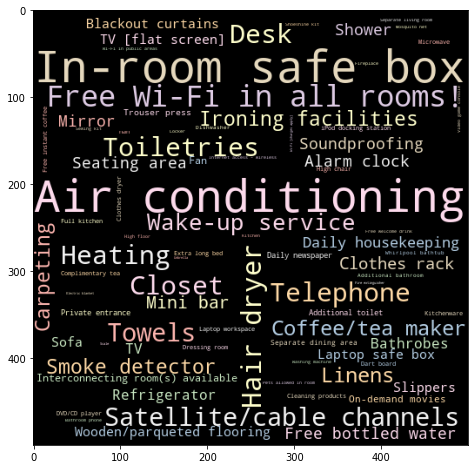

In [27]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width = 500, 
                      height = 500,
                      colormap="Pastel1").generate_from_frequencies(amenities_dict)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.show()

In [28]:
def amenities(x):
  li = str(x).split(': ;')
  for i in li:
    if i == '' :
      li.remove(i)
    if i == 'Wi-Fi [free]':
      li.remove(i)
      li.append('Free Wi-Fi in all rooms!')

  return ','.join(li)

hotel_df['roomamenities'] = hotel_df['roomamenities'].apply(lambda x: amenities(x))
hotel_df.head()

,index,hotelid,hotelname,city,latitude,longitude,starrating,roomamenities,roomtype,ratedescription,onsiterate,mealinclusiontype,maxoccupancy
0,67027,405050,... mein romantisches Hotel Toalstock,Fiss,47.056309,10.61966,4,"Air conditioning,Bathrobes,Carpeting,Closet,De...",Double Room with Balcony,"Room size: 28 m²/301 ft², Balcony/terrace, Sho...",209.77,Free Breakfast,1
1,67029,405050,... mein romantisches Hotel Toalstock,Fiss,47.056309,10.61966,4,"Air conditioning,Bathrobes,Carpeting,Closet,De...",Junior Suite with Balcony,"Room size: 36 m²/388 ft², Balcony/terrace, Sho...",233.88,Free Breakfast,1
2,67028,405050,... mein romantisches Hotel Toalstock,Fiss,47.056309,10.61966,4,"Air conditioning,Bathrobes,Carpeting,Closet,De...",Deluxe Double Room,"Room size: 34 m²/366 ft², Balcony/terrace, Sho...",233.88,Free Breakfast,1
3,21449,8092174,1 Brade Street,Broughton in Furness,54.277100,-3.21100,4,"Air conditioning,Closet,Fireplace,Free Wi-Fi i...",Vacation Home,"Shower, Kitchenette, 2 bedrooms, 2 single beds...",361.13,NaN,4
4,95296,1013417,1 Elliot Terrace,Plymouth,50.365479,-4.14496,4,"Additional toilet,Air conditioning,Carpeting,C...",Four-Bedroom Apartment with Sea View,"Room size: 110 m²/1184 ft², Balcony/terrace, S...",210.16,NaN,3


#### ratedescription

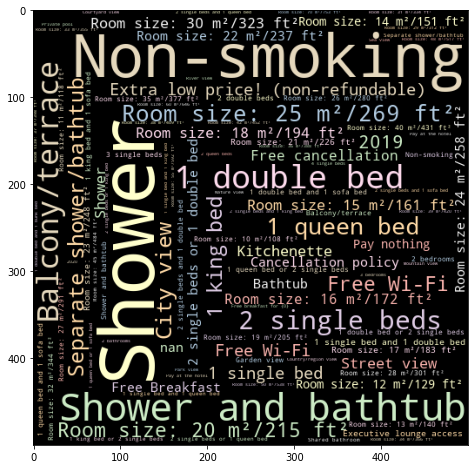

In [29]:
amenities_dict= {}

for row_idx in range(len(hotel_df)):
  amenities = str(hotel_df.loc[row_idx,'ratedescription']).split(',')
  for amenity in amenities:
    if 'Free cancellation' in amenity:
      amenity = 'Free cancellation'
    if 'Pay nothing' in amenity:
      amenity = 'Pay nothing'
    if amenity in amenities_dict:
      amenities_dict[amenity]+=1
    else:
      amenities_dict[amenity] = 1

wordcloud = WordCloud(width = 500, 
                      height = 500,
                      colormap="Pastel1").generate_from_frequencies(amenities_dict)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.show()


General info customers want to know the most:
- bathtub
- Non-smoking
- Balcony/terrace
- Free cancellation
- Free Breakfast
- Pay nothing
- Smoking allowed 
- Extra low price! (non-refundable)
- view 


In [30]:
general_info = ('bathtub', 'Non-smoking', 'Balcony/terrace', 'Free cancellation','Free Breakfast','Pay nothing','Smoking allowed','Extra low price! (non-refundable)')

def description(x):
  li = str(x).split(',')

  for i in li:
    strip_i = i.lstrip(' ')
    if strip_i in general_info or 'view' in strip_i or 'bed' in strip_i or 'beds' in strip_i or 'bathtub' in strip_i:
      pass
    else:
      li.remove(i)

  return ','.join(li)

hotel_df['ratedescription'] = hotel_df['ratedescription'].apply(lambda x: description(x))
hotel_df.head()

,index,hotelid,hotelname,city,latitude,longitude,starrating,roomamenities,roomtype,ratedescription,onsiterate,mealinclusiontype,maxoccupancy
0,67027,405050,... mein romantisches Hotel Toalstock,Fiss,47.056309,10.61966,4,"Air conditioning,Bathrobes,Carpeting,Closet,De...",Double Room with Balcony,"Balcony/terrace, 1 king bed",209.77,Free Breakfast,1
1,67029,405050,... mein romantisches Hotel Toalstock,Fiss,47.056309,10.61966,4,"Air conditioning,Bathrobes,Carpeting,Closet,De...",Junior Suite with Balcony,"Balcony/terrace, Shower and bathtub, 1 king b...",233.88,Free Breakfast,1
2,67028,405050,... mein romantisches Hotel Toalstock,Fiss,47.056309,10.61966,4,"Air conditioning,Bathrobes,Carpeting,Closet,De...",Deluxe Double Room,"Balcony/terrace, Shower and bathtub, 1 king bed",233.88,Free Breakfast,1
3,21449,8092174,1 Brade Street,Broughton in Furness,54.277100,-3.21100,4,"Air conditioning,Closet,Fireplace,Free Wi-Fi i...",Vacation Home,"Kitchenette, 2 bedrooms, 2 single beds or 1 q...",361.13,NaN,4
4,95296,1013417,1 Elliot Terrace,Plymouth,50.365479,-4.14496,4,"Additional toilet,Air conditioning,Carpeting,C...",Four-Bedroom Apartment with Sea View,"Balcony/terrace, Shower and bathtub, 4 bedroo...",210.16,NaN,3


In [31]:
total_a = list(set(','.join(hotel_df['roomamenities']).split(',')))
total_a = [x for x in total_a if x not in ('','nan')]
total_a

['Mosquito net',
 'Dishwasher',
 'Closet',
 'Refrigerator',
 'First aid kit',
 'Whirlpool bathtub',
 'Free instant coffee',
 'Wooden/parqueted flooring',
 'Kitchenware',
 'Dressing room',
 'Separate dining area',
 'Slippers',
 'Linens',
 'Heating',
 'Internet access – wireless',
 'Vending machine',
 'High floor',
 'Trouser press',
 'Clothes dryer',
 'Wi-Fi in public areas',
 'Bathrobes',
 'Air conditioning',
 'Free Wi-Fi in all rooms!',
 'Shoeshine kit',
 'Ironing facilities',
 'Satellite/cable channels',
 'Alarm clock',
 'Shower',
 'Toiletries',
 'Additional bathroom',
 'Hair dryer',
 'Daily newspaper',
 'TV [in bathroom]',
 'Interconnecting room(s) available',
 'Clothes rack',
 'Telephone',
 'Soundproofing',
 'Hot tub',
 'Carpeting',
 'Coffee/tea maker',
 'Separate living room',
 'Wake-up service',
 'Humidifier',
 'Mini bar',
 'Video game console',
 'Cleaning products',
 'Seating area',
 'Sewing kit',
 'Laptop workspace',
 'Washing machine',
 'iPod docking station',
 'Carbon monoxide

In [32]:
hotel_df['mealinclusiontype'] = hotel_df['mealinclusiontype'].fillna('Breakfast not included')

#### Mini recommendation program

In [33]:
pd.options.display.max_colwidth = 500

def similar(x):
    count = 0
    x = x.split(',')
    for i in amenities:
      if i in x:
        count += 1
      else:
        pass
    return count

def reservation_program():
  city = input('In which city do you plan to stay?')
  price = float(input('What is your maximal budget?'))
  guests = int(input('How many guests?'))

  hotel_recommendations = hotel_df[hotel_df['city']==city]
  hotel_recommendations = hotel_recommendations[hotel_recommendations['onsiterate'] <= price]
  hotel_recommendations = hotel_recommendations[hotel_recommendations['maxoccupancy'] <= guests]

  return hotel_recommendations

#------------------------------messy codes....
my_reservation = reservation_program()

amenities = input(f'Which amenities do you need during the stay? {total_a}')

amenities = amenities.split(',')
for i in amenities:
  i = i.strip()

my_reservation['count'] = my_reservation.roomamenities.apply(lambda x: similar(x))

hotels = my_reservation.sort_values('count', ascending=False).head()

print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print(f'We recommend you following hotels: {set(hotels.hotelname)}')
hotels[['hotelname','city','starrating','roomtype','onsiterate','roomamenities','ratedescription','mealinclusiontype']]

In which city do you plan to stay?Berlin
What is your maximal budget?100
How many guests?3
Which amenities do you need during the stay? ['Mosquito net', 'Dishwasher', 'Closet', 'Refrigerator', 'First aid kit', 'Whirlpool bathtub', 'Free instant coffee', 'Wooden/parqueted flooring', 'Kitchenware', 'Dressing room', 'Separate dining area', 'Slippers', 'Linens', 'Heating', 'Internet access – wireless', 'Vending machine', 'High floor', 'Trouser press', 'Clothes dryer', 'Wi-Fi in public areas', 'Bathrobes', 'Air conditioning', 'Free Wi-Fi in all rooms!', 'Shoeshine kit', 'Ironing facilities', 'Satellite/cable channels', 'Alarm clock', 'Shower', 'Toiletries', 'Additional bathroom', 'Hair dryer', 'Daily newspaper', 'TV [in bathroom]', 'Interconnecting room(s) available', 'Clothes rack', 'Telephone', 'Soundproofing', 'Hot tub', 'Carpeting', 'Coffee/tea maker', 'Separate living room', 'Wake-up service', 'Humidifier', 'Mini bar', 'Video game console', 'Cleaning products', 'Seating area', 'Sewing 

,hotelname,city,starrating,roomtype,onsiterate,roomamenities,ratedescription,mealinclusiontype
65428,Hotel Bonverde (Wannsee-Hof),Berlin,2,Standard Twin Room,72.33,"Additional toilet,Air conditioning,Alarm clock,Closet,Clothes dryer,Clothes rack,Desk,Free Wi-Fi in all rooms!,Hair dryer,Heating,In-room safe box,Ironing facilities,Linens,Satellite/cable channels,Smoke detector,Soundproofing,Telephone,Toiletries,Towels,Wake-up service,Wooden/parqueted flooring","Balcony/terrace, Non-smoking, 2 single beds",Breakfast not included
65417,Hotel Bonverde (Wannsee-Hof),Berlin,2,Superior Room With 2 Single Beds,89.41,"Additional toilet,Air conditioning,Carpeting,Closet,Clothes dryer,Clothes rack,Desk,Free Wi-Fi in all rooms!,Hair dryer,Heating,In-room safe box,Ironing facilities,Linens,Satellite/cable channels,Smoke detector,Soundproofing,Telephone,Toiletries,Towels,Wake-up service","Balcony/terrace, 2 single beds",Free Breakfast
65432,Hotel Bonverde (Wannsee-Hof),Berlin,2,Standard Twin Room,89.41,"Additional toilet,Air conditioning,Alarm clock,Closet,Clothes dryer,Clothes rack,Desk,Free Wi-Fi in all rooms!,Hair dryer,Heating,In-room safe box,Ironing facilities,Linens,Satellite/cable channels,Smoke detector,Soundproofing,Telephone,Toiletries,Towels,Wake-up service,Wooden/parqueted flooring","Balcony/terrace, Non-smoking, 2 single beds",Free Breakfast
65431,Hotel Bonverde (Wannsee-Hof),Berlin,2,Standard Twin Room,82.38,"Additional toilet,Air conditioning,Alarm clock,Closet,Clothes dryer,Clothes rack,Desk,Free Wi-Fi in all rooms!,Hair dryer,Heating,In-room safe box,Ironing facilities,Linens,Satellite/cable channels,Smoke detector,Soundproofing,Telephone,Toiletries,Towels,Wake-up service,Wooden/parqueted flooring","Balcony/terrace, Non-smoking, 2 single beds",Breakfast not included
65430,Hotel Bonverde (Wannsee-Hof),Berlin,2,Standard Twin Room,82.38,"Additional toilet,Air conditioning,Alarm clock,Closet,Clothes dryer,Clothes rack,Desk,Free Wi-Fi in all rooms!,Hair dryer,Heating,In-room safe box,Ironing facilities,Linens,Satellite/cable channels,Smoke detector,Soundproofing,Telephone,Toiletries,Towels,Wake-up service,Wooden/parqueted flooring","Balcony/terrace, Non-smoking, 2 single beds",Breakfast not included
